In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dataset = pd.read_csv(uri)

dataset.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
swap = {
    0 : 1,
    1 : 0
}

dataset['finished'] = dataset.unfinished.map(swap)

dataset.head()

,unfinished,expected_hours,price,finished
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [3]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', data = dataset)

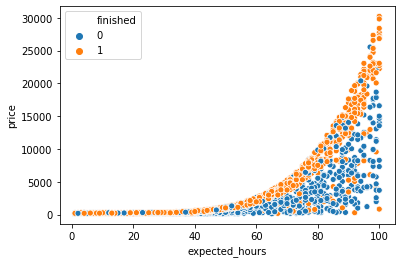

In [4]:
import seaborn as sns

sns.scatterplot(x='expected_hours', y='price', hue='finished', data = dataset)

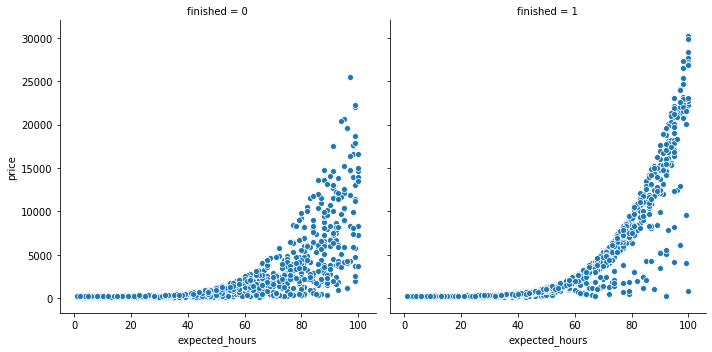

In [5]:
import seaborn as sns

sns.relplot(x='expected_hours', y='price', col='finished', data = dataset)

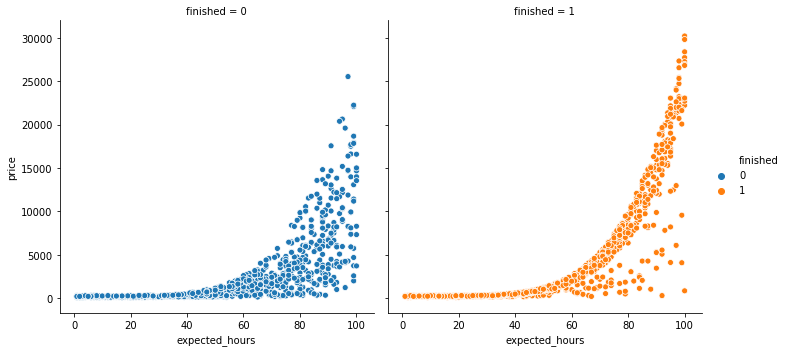

In [6]:
##relplot with hue
import seaborn as sns

sns.relplot(x='expected_hours', y='price', hue='finished', col='finished', data = dataset)

In [7]:
x = dataset[['expected_hours' ,'price']]
y = dataset['finished']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = SEED, stratify = y)

print('Treinaremos com %d e testaremos com %d elementos' % (len(train_x), len(test_x)))

model = LinearSVC(random_state = 20)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('Tivemos uma precisão de %.2f%%' % (accuracy))

Treinaremos com 1617 e testaremos com 540 elementos
Tivemos uma precisão de 54.26%


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Mesmo do anterior, mas com o seed do numpy configurado

In [9]:
##Kick Predictions é um chute a caralha, ou seja, chutar está com uma chance maior de acertar que os 47% do teste
import numpy as np

base_line = np.ones(540)

accuracy = accuracy_score(test_y, base_line) * 100
print('Tivemos uma precisão de baseline de %.2f%%' % (accuracy))

Tivemos uma precisão de baseline de 52.59%


In [10]:
##SEED DO NUMPY é o Default para o train_test_split e o LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Treinaremos com %d e testaremos com %d elementos' % (len(train_x), len(test_x)))

model = LinearSVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('Tivemos uma precisão de %.2f%%' % (accuracy))

Treinaremos com 1617 e testaremos com 540 elementos
Tivemos uma precisão de 52.78%


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


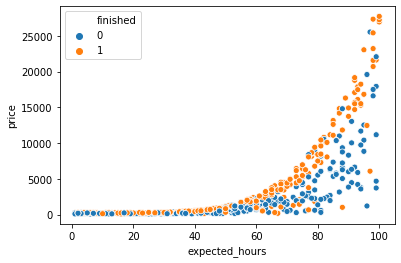

In [11]:
sns.scatterplot(x='expected_hours', y='price', hue=test_y, data=test_x)

In [12]:
x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

print(x_min, x_max, y_min, y_max)

1 100 101 27738


In [13]:
pixel = 100

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixel)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixel)

In [14]:
xx, yy = np.meshgrid(x_axis, y_axis)
dots = np.c_[xx.ravel(), yy.ravel()]

In [15]:
z = model.predict(dots)
z = z.reshape(xx.shape)

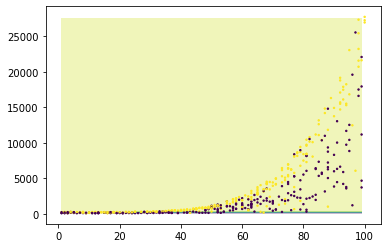

In [16]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=2)

## Conclusão
Nossa curva de decisão está horrorosa em relação ao gráfico real de resultados.
Então fodeu Bahia quando estamos trabalhando com valores diferentes de 0 e 1, pois não são valores lineares, precisamos de outros algorítimos estimadores para isso. Como o SVC

In [17]:
##SEED DO NUMPY é o Default para o train_test_split, LinearSVC, SVC....
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

np.random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

print('Treinaremos com %d e testaremos com %d elementos' % (len(train_x), len(test_x)))

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('Tivemos uma precisão de %.2f%%' % (accuracy))

Treinaremos com 1617 e testaremos com 540 elementos
Tivemos uma precisão de 53.15%


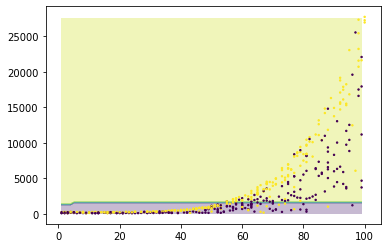

In [18]:
pixel = 100

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixel)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixel)
xx, yy = np.meshgrid(x_axis, y_axis)
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y, s=2)

#### Precisamos escalar os valores entre `x` e `y`, pois está muito diferente entre `0-100` e `0-30000`

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

np.random.seed(SEED)

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, stratify = y)

scaler = StandardScaler()

scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

print('Treinaremos com %d e testaremos com %d elementos' % (len(train_x), len(test_x)))

model = SVC()
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('Tivemos uma precisão de %.2f%%' % (accuracy))

Treinaremos com 1617 e testaremos com 540 elementos
Tivemos uma precisão de 70.37%


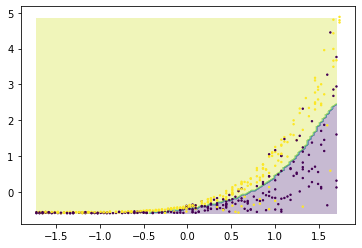

In [23]:
pixel = 100

data_x = test_x[:,0]
data_y = test_x[:,1]


x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

x_axis = np.arange(x_min, x_max, (x_max - x_min) / pixel)
y_axis = np.arange(y_min, y_max, (y_max - y_min) / pixel)
xx, yy = np.meshgrid(x_axis, y_axis)
dots = np.c_[xx.ravel(), yy.ravel()]
z = model.predict(dots)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y, s=2)